In [1]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
#Read the data containing the texts
textos = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje profundo/Proyecto final/Archivos del proyecto/files_data_DL.csv')
textos

,pdf_texts,page_number,table_number,image_number,word_number,character_number,spec_in_url,doc_type,has_text
0,Accessories (Order Separately)\nMCCAPS – Wire ...,2,3,3,1324,7707,0,other,1
1,Project: \nLocation: \nCat.No: \nType: \nLamps...,1,3,2,837,5180,0,other,1
2,Description\nSoftglo LED night lights provide ...,2,7,6,720,4217,0,spec_sheet,1
3,TruGroove surface\nTruGroove_Surface_SpecShee...,9,18,19,4366,25714,0,spec_sheet,1
4,FEATURES & SPECIFICATIONS\nINTENDED USE — Rece...,3,3,7,1101,6734,1,spec_sheet,1
...,...,...,...,...,...,...,...,...,...
496,"LFR-4RD\nLITEFRAME 4"" ROUND DOWNLIGHT\ncurrent...",11,57,23,3637,21643,1,spec_sheet,1
497,Page 1\nS4LIP TUWH PENDANT PATTERNS 01/12/2...,7,18,4,2197,13961,1,spec_sheet,1
498,A\n_ _ _ _ _ _\n_ _ _ _ _ _\n_\nSHIELDING\nCRI...,5,17,4,2118,12693,1,spec_sheet,1
499,Rook 350 Square Pendants\n LIT-2216 • 0...,9,38,5,3726,20948,1,spec_sheet,1


In [3]:
textos['densidad'] = textos['character_number']/textos['word_number']
textos

,pdf_texts,page_number,table_number,image_number,word_number,character_number,spec_in_url,doc_type,has_text,densidad
0,Accessories (Order Separately)\nMCCAPS – Wire ...,2,3,3,1324,7707,0,other,1,5.820997
1,Project: \nLocation: \nCat.No: \nType: \nLamps...,1,3,2,837,5180,0,other,1,6.188769
2,Description\nSoftglo LED night lights provide ...,2,7,6,720,4217,0,spec_sheet,1,5.856944
3,TruGroove surface\nTruGroove_Surface_SpecShee...,9,18,19,4366,25714,0,spec_sheet,1,5.889601
4,FEATURES & SPECIFICATIONS\nINTENDED USE — Rece...,3,3,7,1101,6734,1,spec_sheet,1,6.116258
...,...,...,...,...,...,...,...,...,...,...
496,"LFR-4RD\nLITEFRAME 4"" ROUND DOWNLIGHT\ncurrent...",11,57,23,3637,21643,1,spec_sheet,1,5.950784
497,Page 1\nS4LIP TUWH PENDANT PATTERNS 01/12/2...,7,18,4,2197,13961,1,spec_sheet,1,6.354574
498,A\n_ _ _ _ _ _\n_ _ _ _ _ _\n_\nSHIELDING\nCRI...,5,17,4,2118,12693,1,spec_sheet,1,5.992918
499,Rook 350 Square Pendants\n LIT-2216 • 0...,9,38,5,3726,20948,1,spec_sheet,1,5.622115


C:\Users\alvar\AppData\Local\Temp\ipykernel_25664\2423103508.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(data = textos, x = 'doc_type', y = 'word_number').set_xticklabels(['Otros', 'Hoja de especificación'])


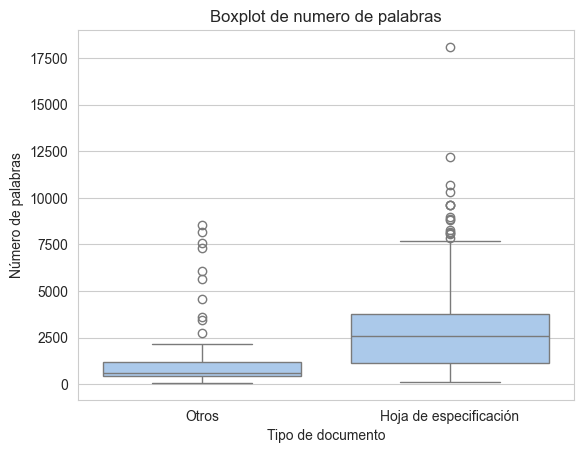

In [12]:
sns.set_palette("pastel")
sns.set_style('whitegrid')
sns.boxplot(data = textos, x = 'doc_type', y = 'word_number').set_xticklabels(['Otros', 'Hoja de especificación'])
plt.title('Boxplot de numero de palabras')
plt.xlabel('Tipo de documento')
plt.ylabel('Número de palabras')
plt.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_25664\330060073.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(data = textos, x = 'doc_type', y = 'character_number').set_xticklabels(['Otros', 'Hoja de especificación'])


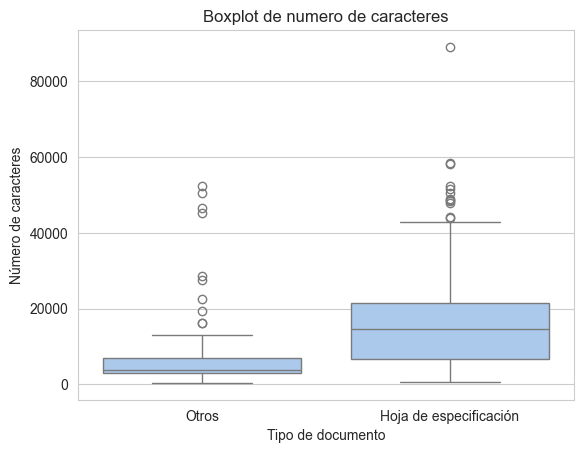

In [13]:
sns.boxplot(data = textos, x = 'doc_type', y = 'character_number').set_xticklabels(['Otros', 'Hoja de especificación'])
plt.title('Boxplot de numero de caracteres')
plt.xlabel('Tipo de documento')
plt.ylabel('Número de caracteres')
plt.show()

C:\Users\alvar\AppData\Local\Temp\ipykernel_25664\2585520725.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(data = textos, x = 'doc_type', y = 'densidad').set_xticklabels(['Otros', 'Hoja de especificación'])


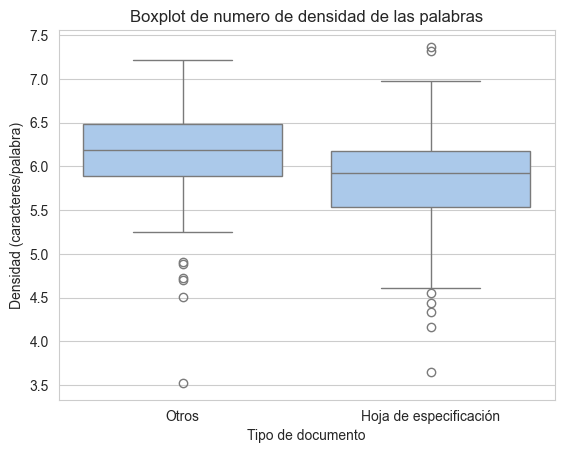

In [14]:
sns.boxplot(data = textos, x = 'doc_type', y = 'densidad').set_xticklabels(['Otros', 'Hoja de especificación'])
plt.title('Boxplot de numero de densidad de las palabras')
plt.xlabel('Tipo de documento')
plt.ylabel('Densidad (caracteres/palabra)')
plt.show()

Se crean los diferentes datos de entrada para el modelo

In [24]:
word = textos['word_number']
characters = textos['character_number']
density = textos['densidad']
word_char = textos[['word_number', 'character_number']]
word_density = textos[['word_number', 'densidad']]
char_density = textos[['character_number', 'densidad']]
word_char_density = textos[['word_number', 'character_number', 'densidad']]

doc_type = textos['doc_type']

In [85]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(word, doc_type, test_size=0.2, random_state=5)
model_1 = RandomForestClassifier()

x_train_1 = x_train_1.to_frame()
x_test_1 = x_test_1.to_frame()

model_1 = model_1.fit(x_train_1, y_train_1)
pred_1 = model_1.predict(x_test_1)

precision_1 = metrics.accuracy_score(y_test_1, pred_1)
precision_1


0.7524752475247525

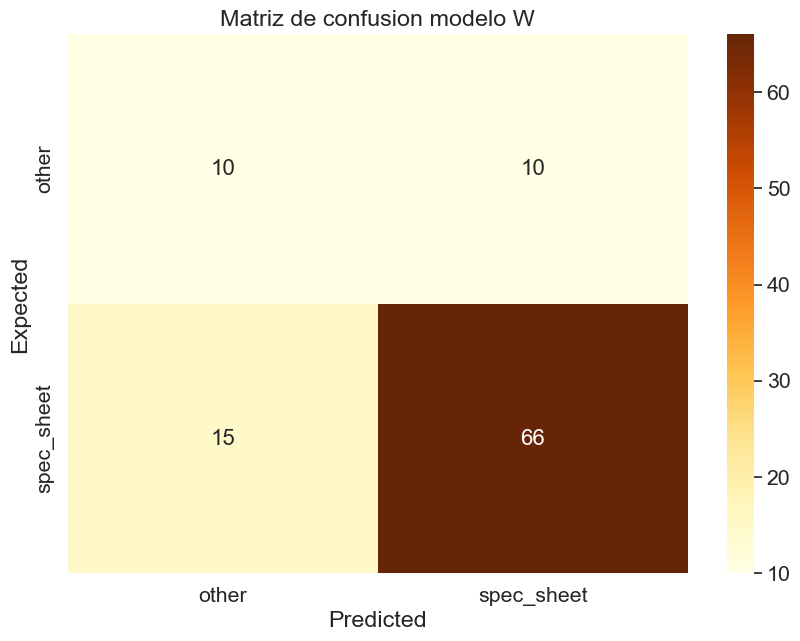

In [86]:
cm = metrics.confusion_matrix(y_test_1, pred_1)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test_1), index = np.unique(y_test_1))
df_cm.index.name = 'Expected'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Matriz de confusion modelo W')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlOrBr", annot=True,annot_kws={"size": 16})
plt.show()

In [87]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(characters, doc_type, test_size=0.2, random_state=5)
model_2 = RandomForestClassifier()

x_train_2 = x_train_2.to_frame()
x_test_2 = x_test_2.to_frame()

model_2 = model_2.fit(x_train_2, y_train_2)
pred_2 = model_2.predict(x_test_2)

precision_2 = metrics.accuracy_score(y_test_2, pred_2)
precision_2

0.7524752475247525

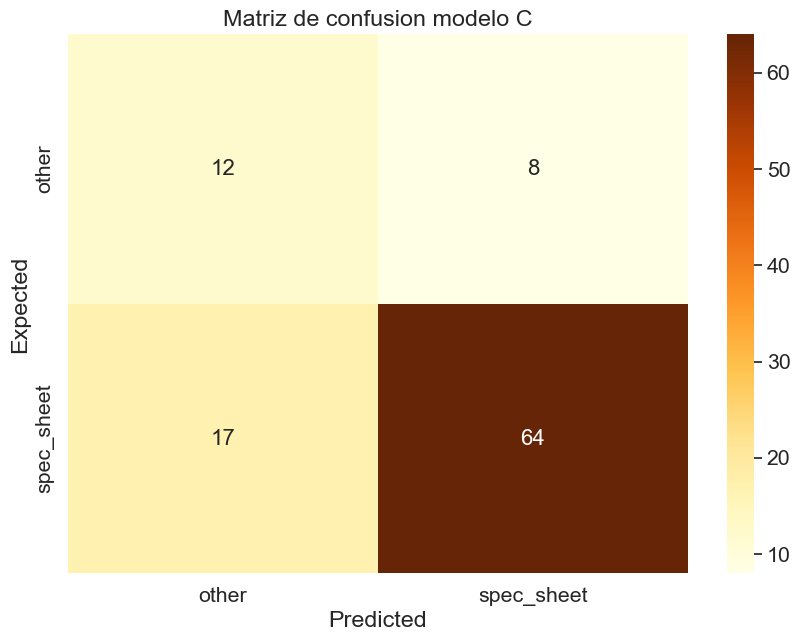

In [88]:
cm = metrics.confusion_matrix(y_test_2, pred_2)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test_2), index = np.unique(y_test_2))
df_cm.index.name = 'Expected'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Matriz de confusion modelo C')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlOrBr", annot=True,annot_kws={"size": 16})
plt.show()

In [89]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(density, doc_type, test_size=0.2, random_state=5)
model_3 = RandomForestClassifier()

x_train_3 = x_train_3.to_frame()
x_test_3 = x_test_3.to_frame()

model_3 = model_3.fit(x_train_3, y_train_3)
pred_3 = model_3.predict(x_test_3)

precision_3 = metrics.accuracy_score(y_test_3, pred_3)
precision_3

0.6732673267326733

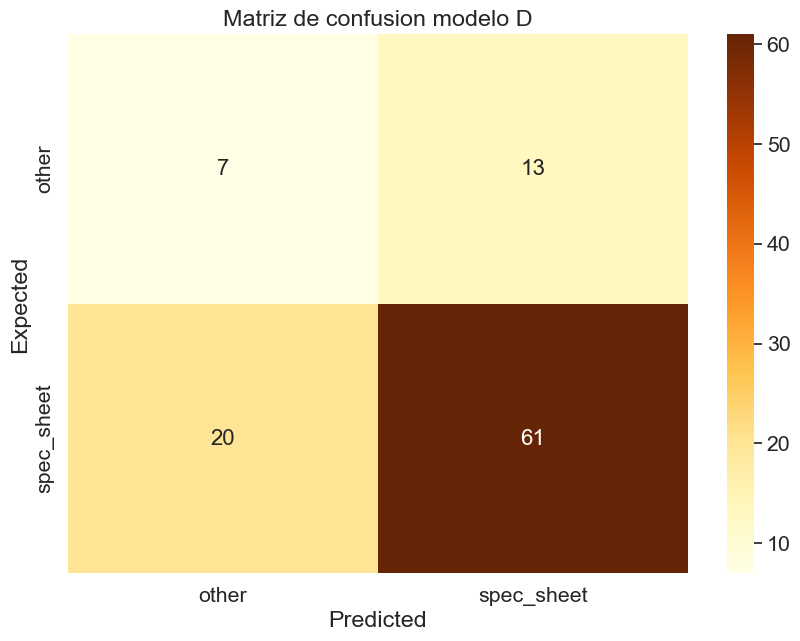

In [90]:
cm = metrics.confusion_matrix(y_test_3, pred_3)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test_3), index = np.unique(y_test_3))
df_cm.index.name = 'Expected'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Matriz de confusion modelo D')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlOrBr", annot=True,annot_kws={"size": 16})
plt.show()

In [91]:
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(word_char, doc_type, test_size=0.2, random_state=5)
model_4 = RandomForestClassifier()

model_4 = model_4.fit(x_train_4, y_train_4)
pred_4 = model_4.predict(x_test_4)

precision_4 = metrics.accuracy_score(y_test_4, pred_4)
precision_4

0.8118811881188119

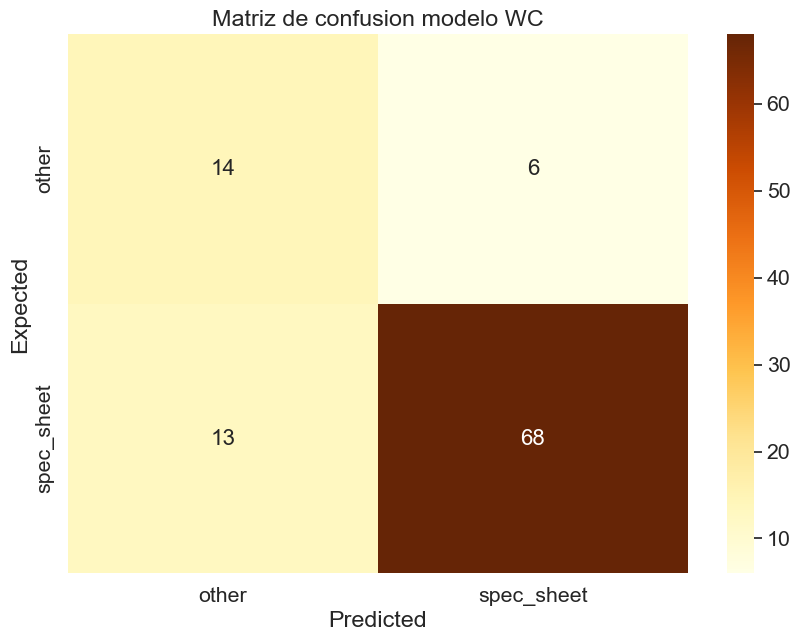

In [92]:
cm = metrics.confusion_matrix(y_test_4, pred_4)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test_4), index = np.unique(y_test_4))
df_cm.index.name = 'Expected'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Matriz de confusion modelo WC')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlOrBr", annot=True,annot_kws={"size": 16})
plt.show()

In [93]:
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(word_density, doc_type, test_size=0.2, random_state=5)
model_5 = RandomForestClassifier()

model_5 = model_5.fit(x_train_5, y_train_5)
pred_5 = model_5.predict(x_test_5)

precision_5 = metrics.accuracy_score(y_test_5, pred_5)
precision_5

0.8514851485148515

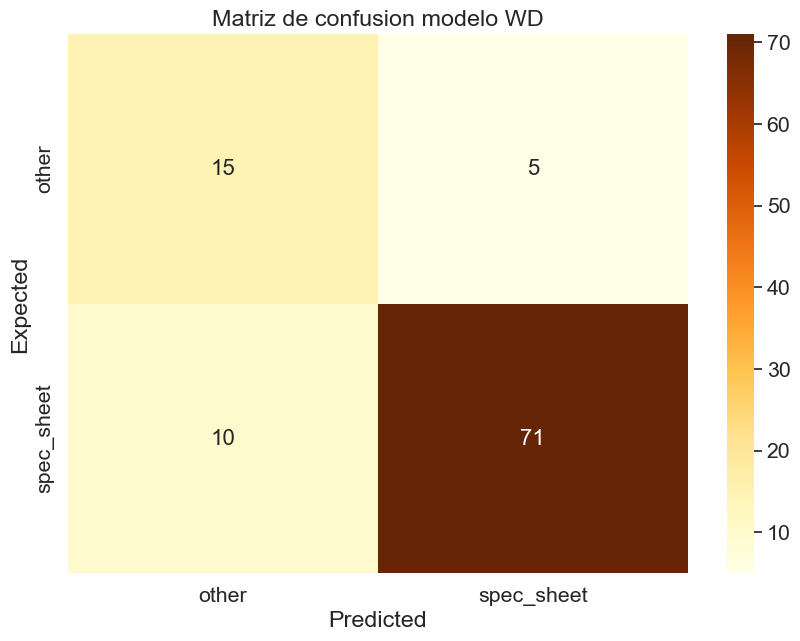

In [94]:
cm = metrics.confusion_matrix(y_test_5, pred_5)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test_5), index = np.unique(y_test_5))
df_cm.index.name = 'Expected'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Matriz de confusion modelo WD')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlOrBr", annot=True,annot_kws={"size": 16})
plt.show()

In [95]:
x_train_6, x_test_6, y_train_6, y_test_6 = train_test_split(char_density, doc_type, test_size=0.2, random_state=5)
model_6 = RandomForestClassifier()

model_6 = model_6.fit(x_train_6, y_train_6)
pred_6 = model_6.predict(x_test_6)

precision_6 = metrics.accuracy_score(y_test_6, pred_6)
precision_6

0.8316831683168316

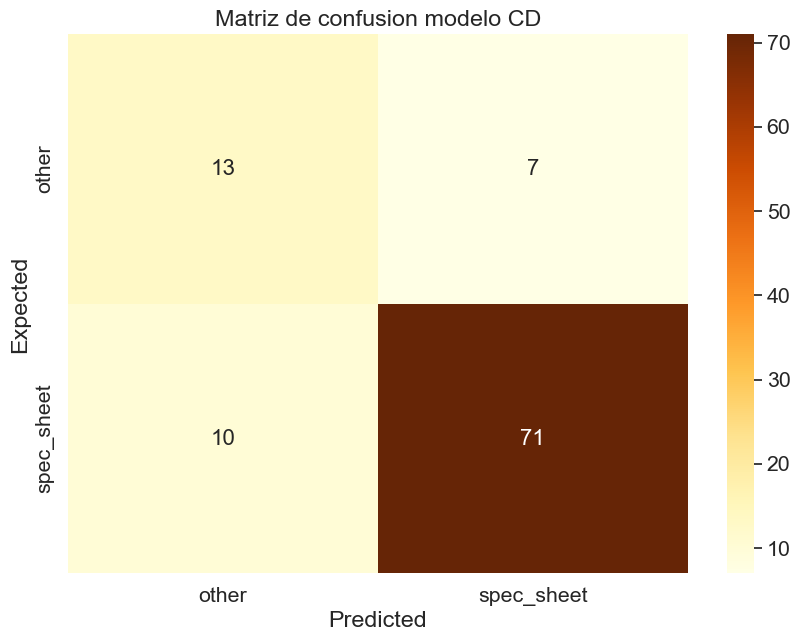

In [96]:
cm = metrics.confusion_matrix(y_test_6, pred_6)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test_6), index = np.unique(y_test_6))
df_cm.index.name = 'Expected'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Matriz de confusion modelo CD')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlOrBr", annot=True,annot_kws={"size": 16})
plt.show()

In [105]:
x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(word_char_density, doc_type, test_size=0.2, random_state=5)
model_7 = RandomForestClassifier()

model_7 = model_7.fit(x_train_7, y_train_7)
pred_7 = model_7.predict(x_test_7)

precision_7 = metrics.accuracy_score(y_test_7, pred_7)
precision_7

0.8217821782178217

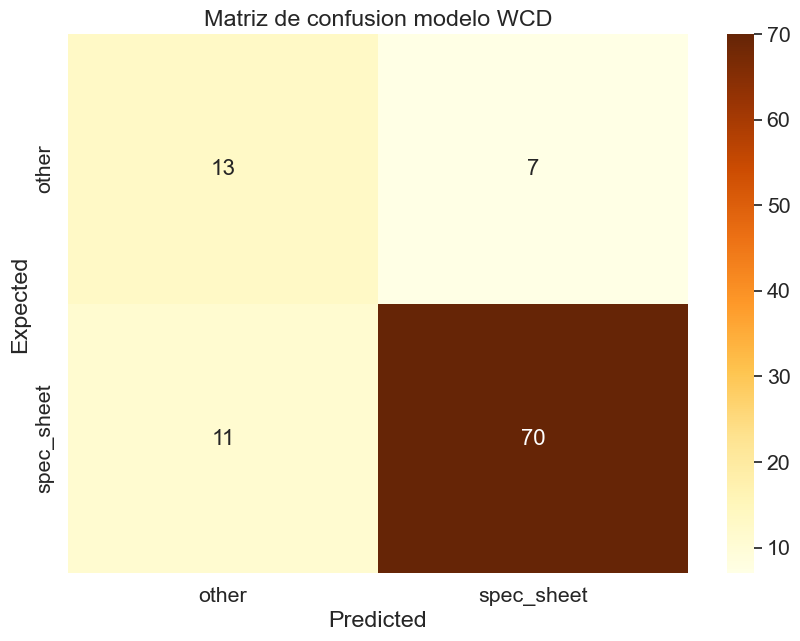

In [106]:
cm = metrics.confusion_matrix(y_test_7, pred_7)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test_7), index = np.unique(y_test_7))
df_cm.index.name = 'Expected'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Matriz de confusion modelo WCD')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlOrBr", annot=True,annot_kws={"size": 16})
plt.show()

In [121]:
final_test = textos[['word_number', 'densidad', 'spec_in_url']]

x_train_8, x_test_8, y_train_8, y_test_8 = train_test_split(final_test, doc_type, test_size=0.2, random_state=5)
model_8 = RandomForestClassifier()

model_8 = model_8.fit(x_train_8, y_train_8)
pred_8 = model_8.predict(x_test_8)

precision_8 = metrics.accuracy_score(y_test_8, pred_8)
precision_8

0.8811881188118812

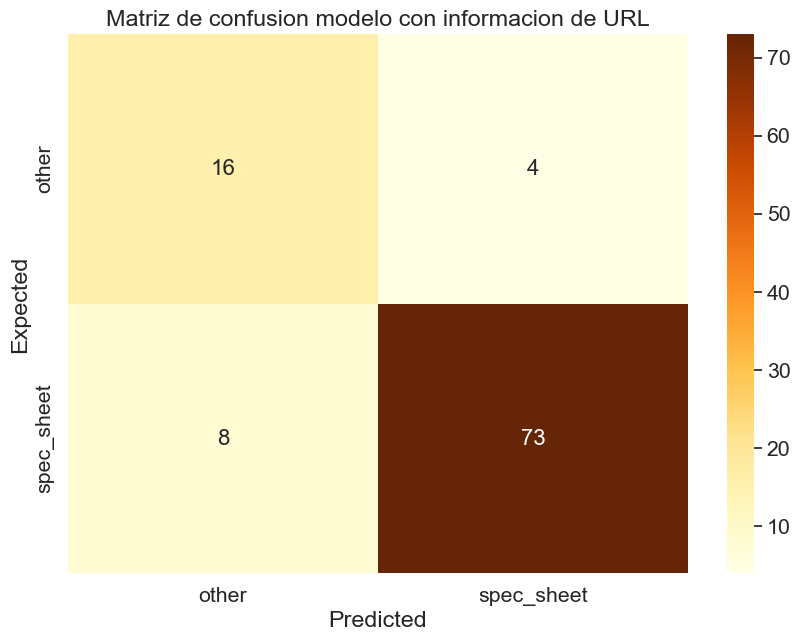

In [122]:
cm = metrics.confusion_matrix(y_test_8, pred_8)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test_8), index = np.unique(y_test_8))
df_cm.index.name = 'Expected'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Matriz de confusion modelo con informacion de URL')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="YlOrBr", annot=True,annot_kws={"size": 16})
plt.show()

In [126]:
bosque = RandomForestClassifier()
bosque_param = [{'n_estimators': list(range(10,120,10)), 'max_depth': list(range(1,30))}]

In [127]:
mejor_bosque = GridSearchCV(bosque, bosque_param, cv=5, scoring='accuracy')
mejor_bosque.fit(x_train_8, y_train_8)
print('El mejor modelo para random forest:')
print(mejor_bosque.best_params_)
print(mejor_bosque.best_score_)
print('---------------------------------------------------------------------------------------------------')

El mejor modelo para random forest:
{'max_depth': 9, 'n_estimators': 50}
0.8875
---------------------------------------------------------------------------------------------------
